# Mario Fernández Rueda - Lab exercises

# Laboratory Homework 1

In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

1. Load the dataset *student_score.csv*. When loading the dataset watch out for the index column. 

In [47]:
#load the data
score = pd.read_csv('students_score.csv')
#drop the first column with the "Unnamed: 0" column which is the one that stays when we save the data as csv
score = score.drop('Unnamed: 0', axis=1)
score.head()

,StudentId,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,520645,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,303683,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,457351,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,812988,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,594678,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


2. Print the size of the dataset. List the number of examples and the number of features.

In [48]:
#number of rows and columns with the shape method
number_rows = score.shape[0]
number_cols = score.shape[1]
print("Number of rows: ", number_rows)
print("Number of columns: ", number_cols)

Number of rows:  30641
Number of columns:  15


3. Show the first 5 examples of the dataset. 

In [49]:
score.head()

,StudentId,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,520645,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,303683,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,457351,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,812988,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,594678,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


4. Using the third example from the dataset print for every feature the type of data (int, float, string or bool).

In [50]:
third_example = score.iloc[2]

#exploring the data types of the columns with the third example
for column in third_example.keys():
    print(column, ":", type(third_example[column]))

StudentId : <class 'numpy.int64'>
Gender : <class 'str'>
EthnicGroup : <class 'str'>
ParentEduc : <class 'str'>
LunchType : <class 'str'>
TestPrep : <class 'str'>
ParentMaritalStatus : <class 'str'>
PracticeSport : <class 'str'>
IsFirstChild : <class 'str'>
NrSiblings : <class 'numpy.float64'>
TransportMeans : <class 'str'>
WklyStudyHours : <class 'str'>
MathScore : <class 'numpy.int64'>
ReadingScore : <class 'numpy.int64'>
WritingScore : <class 'numpy.int64'>


5. For numerical features print the value of mean, standard deviation and median. 


In [51]:
#as before we get the columns from the third example. 
for column in third_example.keys():
    #condition to check if the column is numeric
    if ((type(third_example[column]) == np.float64) or (type(third_example[column]) == np.int64)):
        print(column, ":")
        print("\tmean =", score[column].mean())
        print("\tstd =", score[column].std())
        print("\tmedian =", score[column].median())
        print()

StudentId :
	mean = 549614.8522567801
	std = 257913.25118022808
	median = 550904.0

NrSiblings :
	mean = 2.1473046888437857
	std = 1.466745752729569
	median = 2.0

MathScore :
	mean = 66.5584021409223
	std = 15.361615615344753
	median = 67.0

ReadingScore :
	mean = 69.37753337032082
	std = 14.758951673577863
	median = 70.0

WritingScore :
	mean = 68.41862210763357
	std = 15.443524814264975
	median = 69.0



6. Check if there are any monotonous attributes. If you find a monotonous attribute, remove it from the dataset.

In [52]:
# nunique method to get the number of unique values in each column
score.nunique()

StudentId              30641
Gender                     2
EthnicGroup                5
ParentEduc                 6
LunchType                  2
TestPrep                   2
ParentMaritalStatus        4
PracticeSport              3
IsFirstChild              12
NrSiblings                11
TransportMeans             2
WklyStudyHours             3
MathScore                 95
ReadingScore              90
WritingScore              93
dtype: int64

In [53]:
#the only monotonous feature is StudentId (increasing) that has the same number of different values than all the examples so we can drop it
score = score.drop('StudentId', axis=1)
score.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


7. Check the data for missing values. Print the number of missing values for each feature.

In [54]:
# the sum of the missing values in each column
score.isna().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            903
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

8. Let's deal with the missing values. 

a) For the features EthnicGroup, ParentMaritalStatus and WklyStudyHours replace NaN values with the most common value.

b) For the feature ParentEduc replace NaN value with a string *no formal education*.

c) For the feature TestPrep replace NaN value with a string *none*.

d) For the features PracticeSport and IsFirstChild remove all the examples with NaN values. 

e) For the feature NrSiblings replace the NaN value with the median value.

f) Finally, for the feature TransportMeans replace the NaN value with a string *walking*.




In [55]:
# to see the number of missing values in each column before the changes
print("Number of missing values in each column before:")
print(score.isna().sum())
print()

# a
# Ethnic Group to the most common value
print("A)")
print("Before changing missing values of EthnicGroup to the most common value:", score['EthnicGroup'].isna().sum())
common_value_ethnic = score.groupby('EthnicGroup').size().sort_values(ascending=False).index[0]
score.loc[score.EthnicGroup.isna(),'EthnicGroup']=common_value_ethnic
print("After:", score['EthnicGroup'].isna().sum())

# Parent Marital Status to the most common value
print("Before changing missing values of ParentMaritalStatus to the most common value:", score['ParentMaritalStatus'].isna().sum()) 
common_value_parent = score.groupby('ParentMaritalStatus').size().sort_values(ascending=False).index[0]
score.loc[score.ParentMaritalStatus.isna(),'ParentMaritalStatus']=common_value_parent
print("After:", score['ParentMaritalStatus'].isna().sum())

# Weekly Study Hours to the most common value
print("Before changing missing values of WklyStudyHours to the most common value:", score['WklyStudyHours'].isna().sum())
common_value_hours = score.groupby('WklyStudyHours').size().sort_values(ascending=False).index[0]
score.loc[score.WklyStudyHours.isna(),'WklyStudyHours']=common_value_hours
print("After:", score['WklyStudyHours'].isna().sum())
print()

# b
# Parent Education to [none formal education]
print("B)")
print("Before changing missing values of ParentEducation to [none formal education]:", score['ParentEduc'].isna().sum())
score.loc[score.ParentEduc.isna(),'ParentEduc']="no formal education"
print("After:", score['ParentEduc'].isna().sum())
print()

# c
# Test Prep to [none]
print("C)")
print("Before changing missing values of TestPrep to [none]:", score['TestPrep'].isna().sum())
score.loc[score.TestPrep.isna(),'TestPrep']="none"
print("After:", score['TestPrep'].isna().sum())
print()

# d
# PracticeSport remove all the examples with NaN values. 
print("D)")
print("Before changing missing values of PracticeSport to drop the examples with them:", score['PracticeSport'].isna().sum())
rows_to_drop1 = score.loc[score.PracticeSport.isna()].index
score=score.drop(rows_to_drop1, axis=0)
print("After:", score['PracticeSport'].isna().sum())

# IsFirstChild remove all the examples with NaN values. 
print("Before changing missing values of IsFirstChild to drop the examples with them:", score['IsFirstChild'].isna().sum())
rows_to_drop2 = score.loc[score.IsFirstChild.isna()].index
score=score.drop(rows_to_drop2, axis=0)
print("After:", score['IsFirstChild'].isna().sum())
print()

#e
# NrSiblings to median value 
print("E)")
print("Before changing missing values of NrSiblings to the median value:", score['NrSiblings'].isna().sum())
median_value = score['NrSiblings'].median()
score.loc[score.NrSiblings.isna(),'NrSiblings']=median_value
print("After:", score['NrSiblings'].isna().sum())
print()

#f
# TransportMeans to [walking]
print("F)")
print("Before changing missing values of TransportMeans to [walking]:", score['TransportMeans'].isna().sum())
score.loc[score.TransportMeans.isna(),'TransportMeans']="walking"
print("After:", score['TransportMeans'].isna().sum())
print()


print("Number of missing values in each column after:")
print(score.isna().sum())




Number of missing values in each column before:
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            903
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

A)
Before changing missing values of EthnicGroup to the most common value: 1840
After: 0
Before changing missing values of ParentMaritalStatus to the most common value: 1190
After: 0
Before changing missing values of WklyStudyHours to the most common value: 955
After: 0

B)
Before changing missing values of ParentEducation to [none formal education]: 1845
After: 0

C)
Before changing missing values of TestPrep to [none]: 1830
After: 0

D)
Before changing missing values of PracticeSport to drop the examples with them: 631
After: 0
Before cha

9. Are there inconsistencies in the IsFirstChild column? Replace the inconsistent entries so they match the rest of the values. 

In [56]:
# different labels of the EthnicGroup feature before with the unique method
print("Different labels of the IsFirstChild feature before:")
different = score['IsFirstChild'].unique()
print(different)

# replace the different labels of yes or no with the same 'yes' or 'no' label
# we see that all of the no labels start with n so we can replace them with no
# and the rest with yes
for label in different:
    if label.lower().startswith('n'):
        score['IsFirstChild'] = score['IsFirstChild'].replace(label,'no')
    else:
        score['IsFirstChild'] = score['IsFirstChild'].replace(label,'yes')


print("Different labels of the IsFirstChild feature after:")   
print(score['IsFirstChild'].unique())  

        

Different labels of the IsFirstChild feature before:
['yes' 'no' 'nein' 'nope' 'ye' 'si' 'Yes' 'yeah' 'noo' 'ys' 'yeah boy'
 'es']
Different labels of the IsFirstChild feature after:
['yes' 'no']


10. The final step to preparing the dataset for classification is transforming the non-numeric variables to numeric variables. 
For features Gender and LunchType use OneHot Encoder, and for EthnicGroup, ParentEduc, TestPrep, ParentMaritalStatus, PracticeSport, IsFirstChild, TransportMeans and WklyStudyHours use Label Encoder. 

In [57]:
#one hot encoding
onehot = OneHotEncoder(handle_unknown='ignore')

# fit the encoder with 'Gender'
onehot.fit(score[['Gender']])
# create the exmaples transformed with the encoder
examples_transformed_onehot_gender = onehot.transform(score[['Gender']])
# create a DataFrame with the examples transformed with index=score.index to keep the same index as the original DataFrame 
# and columns=onehot.get_feature_names_out(['Gender']) to get the original column out
examples_transformed_onehot_gender = pd.DataFrame(examples_transformed_onehot_gender.toarray(), columns=onehot.get_feature_names_out(['Gender']), index=score.index)

# same procedure with 'LunchType'
onehot.fit(score[['LunchType']])
examples_transformed_onehot_lunchtype = onehot.transform(score[['LunchType']])
examples_transformed_onehot_lunchtype = pd.DataFrame(examples_transformed_onehot_lunchtype.toarray(), columns=onehot.get_feature_names_out(['LunchType']), index=score.index)

# Concatenate the original DataFrame with the cretaed ones with the one hot encoding
score = pd.concat((score, examples_transformed_onehot_gender, examples_transformed_onehot_lunchtype), axis=1)

# drop the original columns because we don't need them anymore
score = score.drop('Gender', axis=1)
score = score.drop('LunchType', axis=1)

#label encoding
label = LabelEncoder()

# fit the encoder with EthnicGroup column
label.fit(score['EthnicGroup'])
# transform the column with the encoder
score.loc[:,'EthnicGroup'] = label.transform(score.loc[:,'EthnicGroup'])

# same procedure with the rest of the columns
label.fit(score['ParentMaritalStatus'])
score.loc[:,'ParentMaritalStatus'] = label.transform(score.loc[:,'ParentMaritalStatus'])

label.fit(score['ParentEduc'])
score.loc[:,'ParentEduc'] = label.transform(score.loc[:,'ParentEduc'])

label.fit(score['TestPrep'])
score.loc[:,'TestPrep'] = label.transform(score.loc[:,'TestPrep'])

label.fit(score['PracticeSport'])
score.loc[:,'PracticeSport'] = label.transform(score.loc[:,'PracticeSport'])

label.fit(score['IsFirstChild'])
score.loc[:,'IsFirstChild'] = label.transform(score.loc[:,'IsFirstChild'])

label.fit(score['TransportMeans'])
score.loc[:,'TransportMeans'] = label.transform(score.loc[:,'TransportMeans'])

label.fit(score['WklyStudyHours'])
score.loc[:,'WklyStudyHours'] = label.transform(score.loc[:,'WklyStudyHours'])

In [58]:
#save the data in a new csv file in the same folder
score.to_csv('students_score_cleaned.csv',index = False)

# Laboratory Homework 2

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the first exercise and save the final dataset.

In [60]:
# load the data
file_path = 'students_score_cleaned.csv'
score = pd.read_csv(file_path)
score.head()

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0


2. a) Draw a histogram of values for the feature MathScore. Set the number of bins to 20. <br>
   b) With a vertical dashed red line denote the median value and with a vertical dashed green line denote the mean value. Set labels for each.<br>
   c) Title the figure "MathScore Histogram". Add proper x and y axis labels. <br>
   d) Add a grid. <br>
   e) Add a legend, place it in the top left corner.

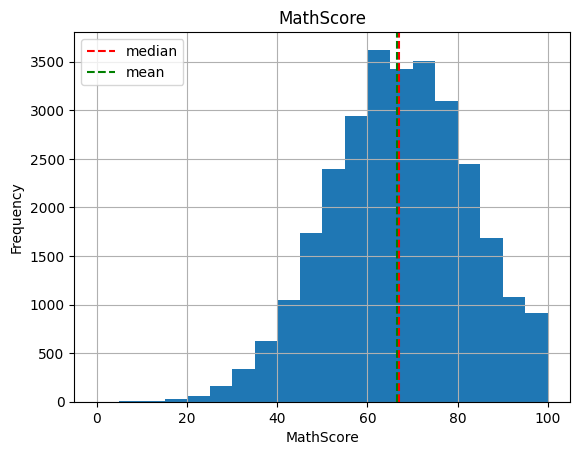

In [61]:
plt.hist(score.MathScore, bins=20)
plt.axvline(score.MathScore.median(), color='red', linestyle='dashed',label='median')
plt.axvline(score.MathScore.mean(), color='green', linestyle='dashed',label='mean')
plt.title('MathScore')
plt.xlabel('MathScore')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

3. a) Make a pie chart of the feature NrSiblings. <br>
   b) Display the labels for each wedge. <br>
   c) Display the percentages within edge wedge. <br>
   d) Title the figure "NrSiblings pie chart".

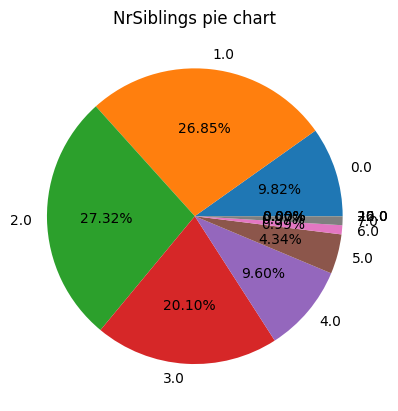

In [62]:
# we get the amount of repetitions of each value of the NrSiblings column and with that we get the percentage
amount_nrsiblings = score.groupby('NrSiblings').count().loc[:,'EthnicGroup'].values
percentage_nrsiblings = amount_nrsiblings/amount_nrsiblings.sum()*100 

#labels for the pie chart
labels_nrsiblings = score.groupby('NrSiblings').count().index

# pie chart
plt.pie(percentage_nrsiblings,labels=labels_nrsiblings,autopct='%.2f%%')
plt.title('NrSiblings pie chart')
plt.show()



4. a) Create a bar chart of the average ReadingScore for each ParentEduc group. <br>
   b) Color each bar in a different color. Set the transparency of the bars to 0.7 <br>
   c) Calculate the standard deviation of the ReadingScore and add a vertical errorbar to the bar tips.

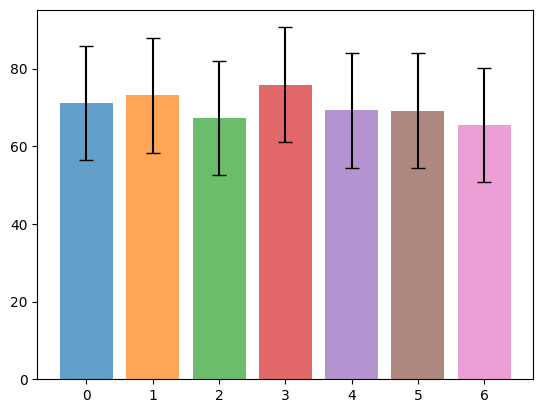

In [63]:
# values for the bar graphic
bar_values = score.groupby('ParentEduc').mean().loc[:,'ReadingScore'].values
# index for the bar graphic
bar_index = score.groupby('ParentEduc').mean().index
# colors to be used in the bar graphic
tableau_colors = mcolors.TABLEAU_COLORS

# bar graphic with the colors and the transparency
plt.bar(bar_index,bar_values,color=tableau_colors,alpha=0.7)
# standard deviation of the values
std=np.std(score['ReadingScore'])
# error bar with the standard deviation
plt.errorbar(bar_index,bar_values,yerr=std,fmt='none',color='black',capsize=5)
plt.show()

5. a) Make a figure divided into 2 rows and 2 columns. Set the figure size to 30 by 30. <br>
   b) In the top left axis:
       1) Draw a line graph of the students' MathScores in descending order.
       2) Color the span on the x axis for which the students' MathScores are less than 50 in red. Set transparency to 0.3.<br>
   c) In the top right axis:
       1) Draw a scatter plot of MathScore vs ReadingScore.
       2) Make the bubbles representing the female students yellow and the ones representing the male students purple. Add and display labels. Set transparency to 0.1.
       3) Set the size of the bubbles to be 50*NrSiblings.<br>
   d) In the bottom left axis:
       1) Draw a boxplot of the WrittingScore feature values.
       2) Remove fliers from the boxplot.<br>
   e) In the borrom right axis:
       1) Draw a bar plot of the number of students using each transportation method.
       2) Make the bar plot stacked by coloring the part of the bar representing the number of students which are first ch-ildren in red and the ones who arent in blue. Add and display labels.

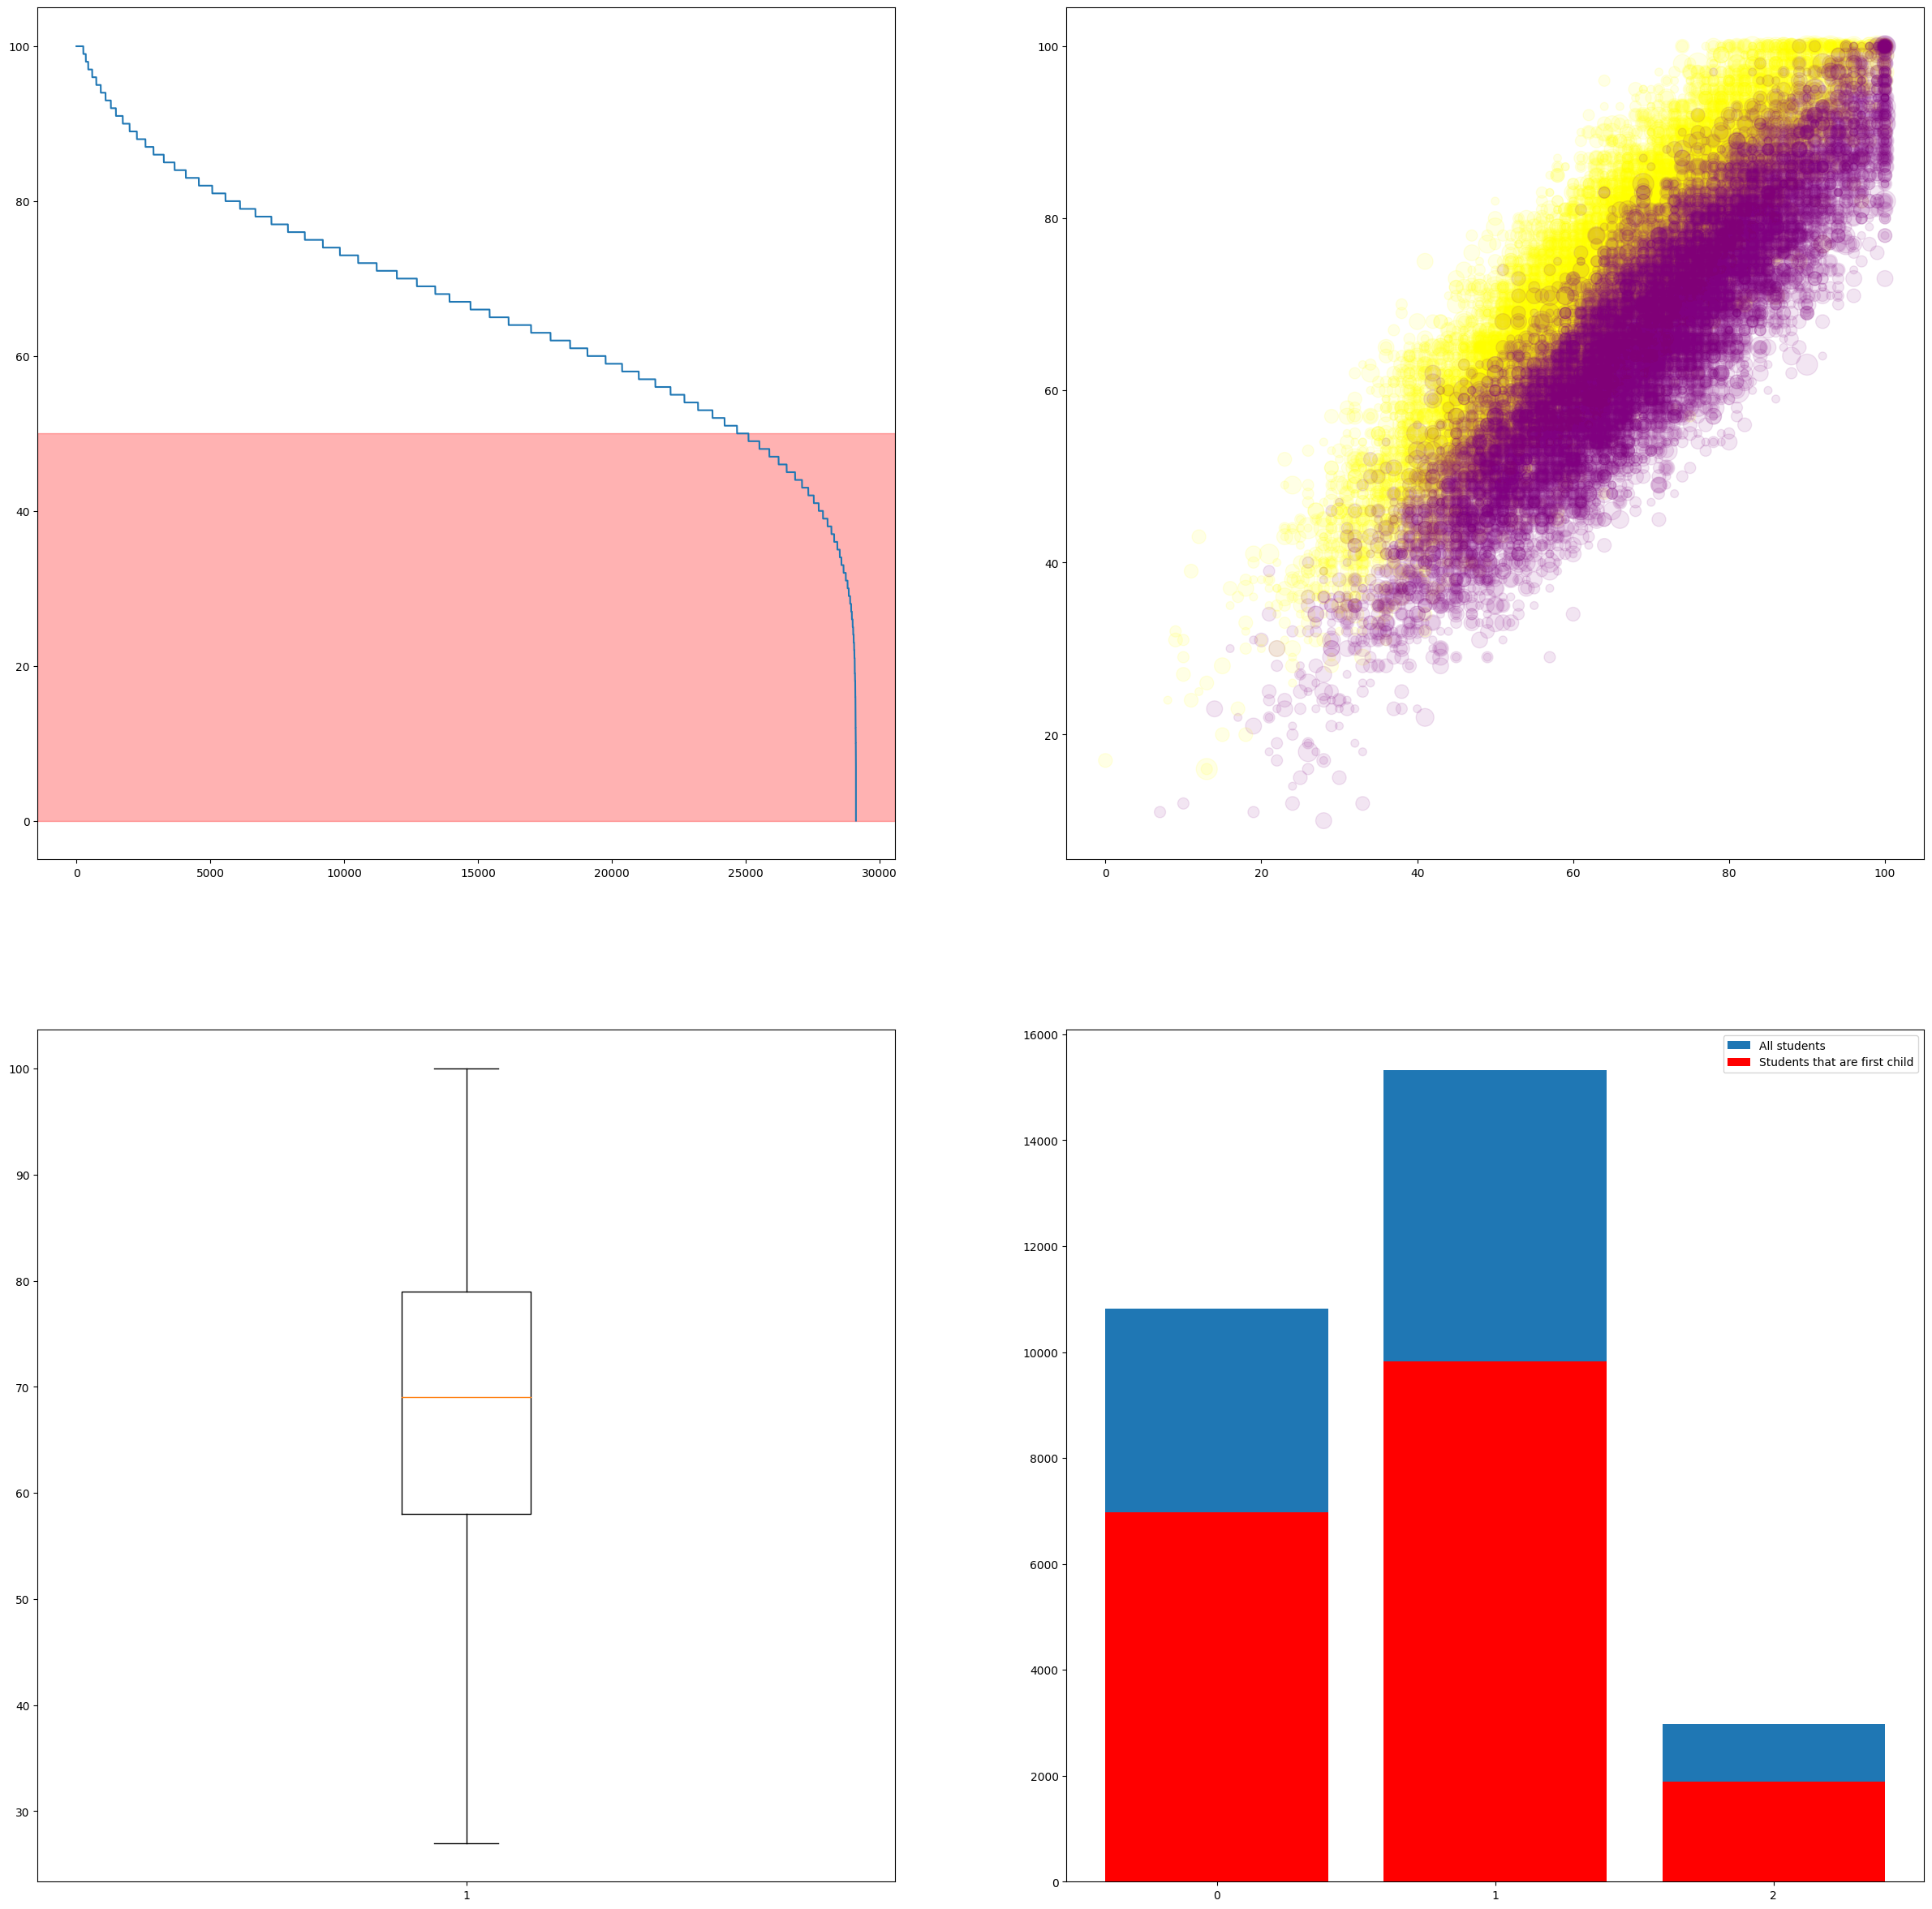

In [64]:
#figure divided into 2 rows and 2 columns.
fig, axes = plt.subplots(2,2,figsize=(30,30))

#first row, first column
#line graphic with the MathScore values sorted in descending order
axes[0,0].axhspan(0,50,color='red',alpha=0.3)
axes[0,0].plot(score.sort_values(by='MathScore',ascending=False).MathScore.values)

#first row, second column
#scatter graphic with the MathScore and ReadingScore values depending of the number of simblings the size of the bubbles
#and the color depending on the gender
size_female = 50 * score.loc[score.Gender_female == 1, 'NrSiblings']
size_male = 50 * score.loc[score.Gender_male == 1, 'NrSiblings']

axes[0,1].scatter(score.loc[score.Gender_female==1,'MathScore'],score.loc[score.Gender_female==1,'ReadingScore'],color='yellow',alpha=0.1,s=size_female)
axes[0,1].scatter(score.loc[score.Gender_male==1,'MathScore'],score.loc[score.Gender_male==1,'ReadingScore'],color='purple',alpha=0.1,s=size_male)

#second row, first column
#boxplot with the WritingScore values without the outliers
data = score['WritingScore'].values
axes[1,0].boxplot(data,showfliers=False)

#second row, second column
#bar graphic with the TransportMeans values for all the students and for the students that are first child
data_transport=score.groupby('TransportMeans').count().loc[:,'IsFirstChild']
axes[1,1].bar(data_transport.index,data_transport.values,label='All students')
axes[1,1].set_xticks(data_transport.index)
data_isfirstchild = score[score['IsFirstChild'] == 1]['TransportMeans'].value_counts()
axes[1,1].bar(data_isfirstchild.index,data_isfirstchild.values,color='red',label='Students that are first child')
axes[1,1].legend(loc='upper right')

plt.show()



6. a) Using seaborn, display a heatmap of the correlation coefficients between the numeric features. <br>
   b) Set the figure size to 20 by 10. <br>
   b) Make the heatmap display 2 decimal places of the values of the correlation coefficients. <br>
   c) Use the "icefire" colormap.

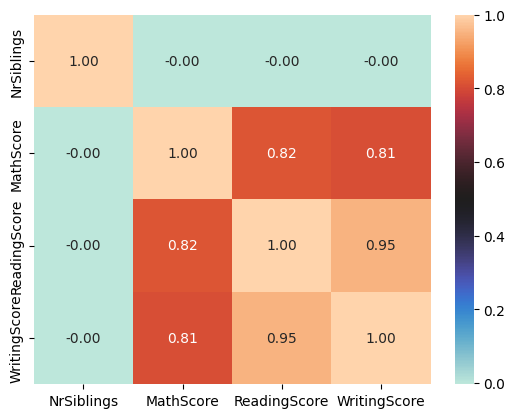

<Figure size 2000x1000 with 0 Axes>

In [65]:
#the numeric features are NrSiblings, WeeklyStudyHours, MathScore, ReadingScore and WritingScore
numeric_features = ['NrSiblings','MathScore','ReadingScore','WritingScore']
score_numeric = score.loc[:,numeric_features]
#create the heatmap with the correlation between the numeric features
sns.heatmap(score_numeric.corr(),cmap='icefire',annot=True,fmt='.2f')
plt.figure(figsize=(20,10))
plt.show()



7. a) Make a scatterplot matrix of all the features. <br>
   b) Remove mirroring scatter plots. <br>
   c) Hue the plot by gender.

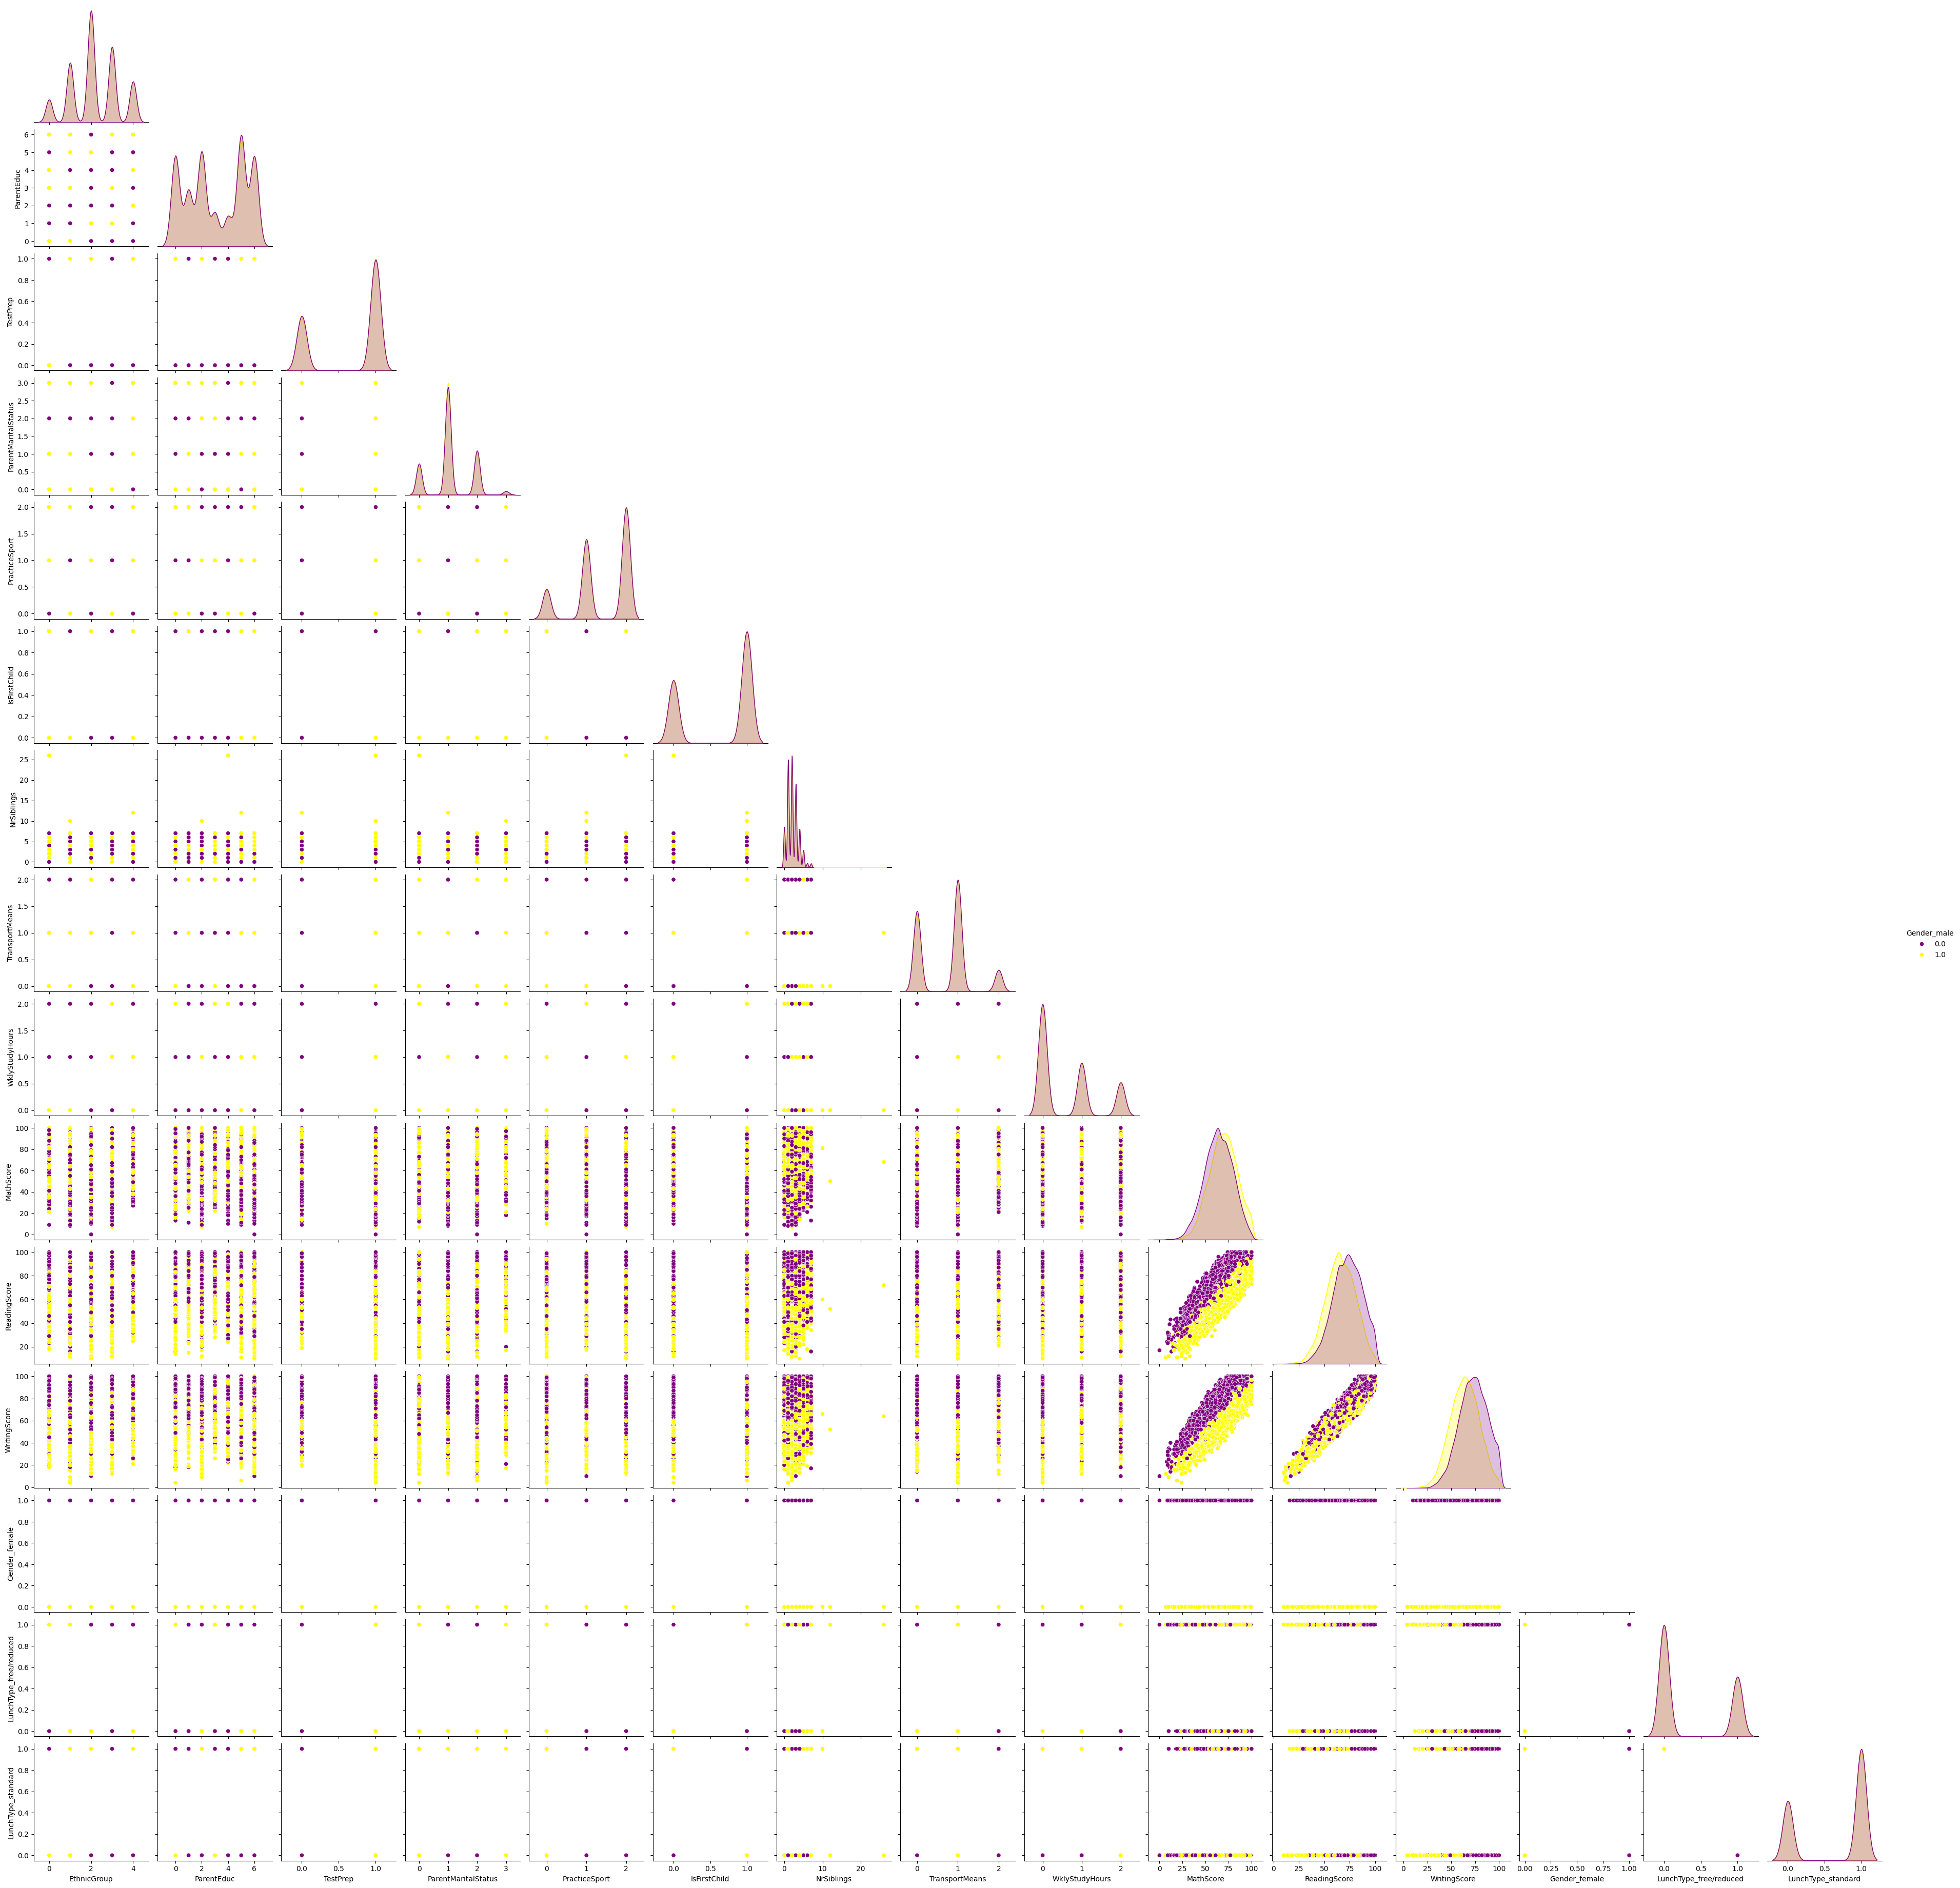

In [66]:
# scatter graphic with all the features making it a matrix
# only the bottom of the matrix because the top is the same as the bottom
# colors yellow for males and purple for females

sns.pairplot(score, hue='Gender_male', palette={0:'purple',1:'yellow'},corner=True)
plt.show()

# Laboratory Homework 3

In [67]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [68]:
#load data
file_path = 'students_score_cleaned.csv'
score = pd.read_csv(file_path)
score.head()

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0


2. a) Find the mean, median and average scores in mathematics, reading and writing. <br>
   b) Find the mean, median and average scores for males and females.<br>
   c) What is the coefficient of variation of the scores? <br>

In [69]:
#a
# variable to store the math score
math_general = score['MathScore']
#mean of the math score
mean_math = math_general.mean()
#median of the math score
median_math = math_general.median()
print("Mean Math Score:", mean_math)
print("Median Math Score:", median_math)
print()

# same procedure with ReadingScore and WritingScore
reading_general = score['ReadingScore']
mean_reading = reading_general.mean()
median_reading = reading_general.median()
print("Mean Reading Score:", mean_reading)
print("Median Reading Score:", median_reading)
print()

writing_general = score['WritingScore']
mean_writing = writing_general.mean()
median_writing = writing_general.median()
print("Mean Writing Score:", mean_writing)
print("Median Writing Score:", median_writing)
print()

# get the average score of the three columns doing the mean of the mean of each column
data_general = score[['MathScore', 'ReadingScore', 'WritingScore']]
average_score_general = data_general.mean(axis=1).mean(axis=0)
print("Average of the three columns:", average_score_general)

Mean Math Score: 66.55994779681973
Median Math Score: 67.0

Mean Reading Score: 69.39008139574818
Median Reading Score: 70.0

Mean Writing Score: 68.42933681354535
Median Writing Score: 69.0

Average of the three columns: 68.12645533537109


In [70]:
#b
#male
print('MALE')

# same procedure as before but with the male students with the Gender_male feature
data_male_math = score.loc[score.Gender_male==1,'MathScore']
mean_math_male = data_male_math.mean() 
median_math_male = data_male_math.median()
print("Mean Male Math Score:", mean_math_male)
print("Median Male Math Score:", median_math_male)
print()

data_male_reading = score.loc[score.Gender_male==1,'ReadingScore']
mean_reading_male = data_male_reading.mean()
median_reading_male = data_male_reading.median()
print("Mean Male Reading Score:", mean_reading_male)
print("Median Male Reading Score:", median_reading_male)
print()

data_male_writing = score.loc[score.Gender_male==1,'WritingScore']
mean_writing_male = data_male_writing.mean()
median_writing_male = data_male_writing.median()
print("Mean Male Writing Score:", mean_writing_male)
print("Median Male Writing Score:", median_writing_male)
print()

data_male = score.loc[score.Gender_male==1,['MathScore', 'ReadingScore', 'WritingScore']]
average_score_male = data_male.mean(axis=1).mean(axis=0) #score[['MathScore', 'ReadingScore', 'WritingScore']].mean(axis=1).mean(axis=0)
print("Average of the three columns (male):", average_score_male)

MALE
Mean Male Math Score: 69.03848816281324
Median Male Math Score: 69.0

Mean Male Reading Score: 65.82465734459366
Median Male Reading Score: 66.0

Mean Male Writing Score: 63.88986570677004
Median Male Writing Score: 64.0

Average of the three columns (male): 66.25100373805898


In [71]:
#b
#female
print('FEMALE')

#same procedure as before but with the female students with the Gender_female feature
data_female_math = score.loc[score.Gender_female==1,'MathScore']
mean_math_female = data_female_math.mean()
median_math_female = data_female_math.median()
print("Mean Female Math Score:", mean_math_female)
print("Median Female Math Score:", median_math_female)
print()

data_female_reading = score.loc[score.Gender_female==1,'ReadingScore']
mean_reading_female = data_female_reading.mean()
median_reading_female = data_female_reading.median()
print("Mean Female Reading Score:", mean_reading_female)
print("Median Female Reading Score:", median_reading_female)
print()

data_female_writing = score.loc[score.Gender_female==1,'WritingScore']
mean_writing_female = data_female_writing.mean()
median_writing_female = data_female_writing.median()
print("Mean Female Writing Score:", mean_writing_female)
print("Median Female Writing Score:", median_writing_female)
print()

data_female = score.loc[score.Gender_female==1,['MathScore', 'ReadingScore', 'WritingScore']]
average_score_female = data_female.mean(axis=1).mean(axis=0) 
print("Average of the three columns (female):", average_score_female)

FEMALE
Mean Female Math Score: 64.11941926249062
Median Female Math Score: 64.0

Mean Female Reading Score: 72.900824756322
Median Female Reading Score: 73.0

Mean Female Writing Score: 72.89918887601391
Median Female Writing Score: 73.0

Average of the three columns (female): 69.97314429827551


In [72]:
# standard deviation of the math score because to get the variation we need the standard deviation
std_math_general = math_general.std()
# variation of the math score using the standard deviation and the mean
variation_mean_math_general = (std_math_general/mean_math)*100

# same procedure with the reading 
std_reading_general = reading_general.std()
variation_mean_reading_general = (std_reading_general/mean_reading)*100

#and writing score
std_writing_general = writing_general.std()
variation_mean_writing_general = (std_writing_general/mean_writing)*100

print("Variation of the Math Score:", variation_mean_math_general)
print("Variation of the Reading Score:", variation_mean_reading_general)
print("Variation of the Writing Score:", variation_mean_writing_general)
print()

#variation of the male math score
std_math_male = data_male_math.std()
variation_mean_math_male = (std_math_male/mean_math_male)*100

# same procedure with the reading score of males
std_reading_male = data_male_reading.std()
variation_mean_reading_male = (std_reading_male/mean_reading_male)*100

# and males writing score
std_writing_male = data_male_writing.std()
variation_mean_writing_general = (std_writing_male/mean_writing_male)*100

print('MALE')
print("Variation of the Male Math Score:", variation_mean_math_male)
print("Variation of the Male Reading Score:", variation_mean_reading_male)
print("Variation of the Male Writing Score:", variation_mean_writing_general)
print()

# same procedure with the females
std_math_female = data_female_math.std()
variation_mean_math_female = (std_math_female/mean_math_female)*100

std_reading_female = data_female_reading.std()
variation_mean_reading_female = (std_reading_female/mean_reading_female)*100

std_writing_female = data_female_writing.std()
variation_mean_writing_female = (std_writing_female/mean_writing_female)*100

print('FEMALE')
print("Variation of the Female Math Score:", variation_mean_math_female)
print("Variation of the Female Reading Score:", variation_mean_reading_female)
print("Variation of the Female Writing Score:", variation_mean_writing_female)
print()



Variation of the Math Score: 23.05328273670259
Variation of the Reading Score: 21.27132583474032
Variation of the Writing Score: 22.574844991058548

MALE
Variation of the Male Math Score: 21.868989387507927
Variation of the Male Reading Score: 21.928522948736937
Variation of the Male Writing Score: 23.37066246920466

FEMALE
Variation of the Female Math Score: 23.695357091781585
Variation of the Female Reading Score: 19.515187006731484
Variation of the Female Writing Score: 20.058800659976498



3. a) Use a statistical test to test the hypothesis:<br>
H0: the mean mathematical scores of females and males are equal.



In [73]:
from scipy import stats

print('MATH')

#here we store the whole data of males and females in differnt  variables
male = score.query('Gender_male == 1')
female = score.query('Gender_female == 1')

#here we use ANOVA because this one tests whether the means of two or more independent samples are significantly different.
statistic, pvalue = stats.ttest_ind(male['MathScore'], female['MathScore'])

print('statistic=%.3f, pvalue=%.3f' % (statistic, pvalue))

#we evaluate the p-value to see if it is less than 0.05, if it is, we can reject the null hypothesis and accept the alternative hypothesis
if pvalue < 0.05:
    print('The difference between males and females in Maths is statitstically significant.')
else:
    print('The difference between males and females in Maths is not statitstically significant.')





MATH
statistic=27.708, pvalue=0.000
The difference between males and females in Maths is statitstically significant.


4. a) Use a statistical test to test the hypothesis:<br>
   H0 Gender did not affect the writing scores.<br>
   H1 Gender affected the writing score.<br>

In [74]:
print('WRITING')

#here we use ttest because this one tests whether the means of two independent samples are significantly different.
statistic, pvalue = stats.ttest_ind(male['WritingScore'], female['WritingScore'])

print('statistic=%.3f, pvalue=%.3f' % (statistic, pvalue))

if pvalue < 0.05:
    print("Reject null hypothesis. Gender affected the writing score. p-value: %.3f" % (pvalue))
else:
    print("Fail to reject null hypothesis. Gender did not affect the writing score. p-value: %.3f" % (pvalue))

WRITING
statistic=-52.017, pvalue=0.000
Reject null hypothesis. Gender affected the writing score. p-value: 0.000


5. a) Statisticaly test the distribuitions of female and male scores across the three scores columns.<br>
b) Plot the distributions for each of the separate scores in both genders. <br>

MathScore: statistic = 698.3529179501126, pvalue = 6.8214008151316e-154
ReadingScore: statistic = 1616.6341717081764, pvalue = 0.0
WritingScore: statistic = 2412.8556211169316, pvalue = 0.0


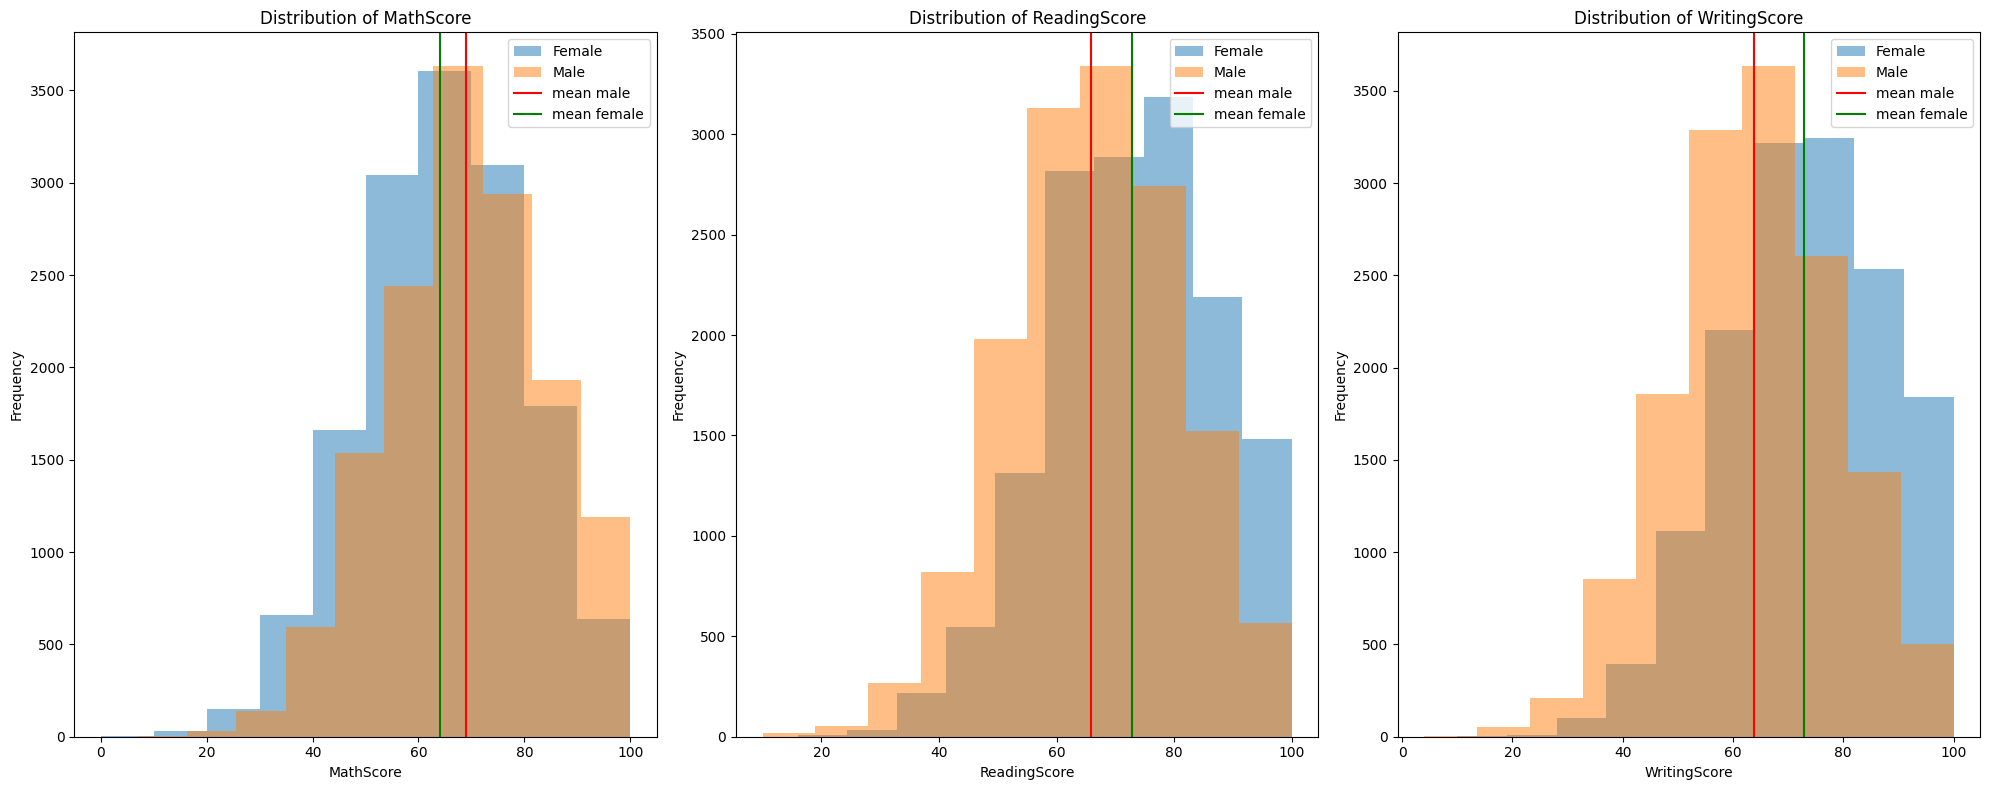

In [75]:
#a
from scipy.stats import kruskal
columns = ['MathScore', 'ReadingScore', 'WritingScore']
# we evaluate the distribution of the three columns with the Kruskal test getting the statistic and the pvalue as before
for column in columns:
    statistic, pvalue = kruskal(female[column], male[column])
    print(f"{column}: statistic = {statistic}, pvalue = {pvalue}")

#b
plt.figure(figsize=(20, 8))

#then once evaluated the distribution of the three columns we plot the histogram of each one
#to see the distribution of the data
for i, column in enumerate(columns, start=1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, index i
    plt.hist(female[column], alpha=0.5, label='Female')
    plt.hist(male[column], alpha=0.5, label='Male')
    plt.axvline(male[column].mean(), color = 'red',label = "mean male")
    plt.axvline(female[column].mean(), color = 'green',label = "mean female")
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Laboratory Homework 4

In [76]:
import pandas as pd
import pingouin as pg
import numpy as np

In [77]:
questionnaire = pd.DataFrame({'Q1': [1, 2, 2, 3, 2, 2, 3, 3, 2, 3],
                              'Q2': [1, 1, 1, 2, 3, 3, 2, 3, 3, 3],
                              'Q3': [1, 1, 2, 1, 2, 3, 3, 3, 2, 3]})

1. Write a function to detrmine the realiability of the questionnaire answers with Cronbach's Alpha.

In [78]:
def cronbach(data):
    # N
    number_labels = len(data.columns)
    # corelation matrix
    correlation_matrix = data.corr()
    # Get the upper corner of the matrix
    upper_corner = np.triu(correlation_matrix, k=1)
    # Create a boolean mask without the 0 values
    mask = upper_corner != 0
    # r
    mean_upper_corner = upper_corner[mask].mean()
    # Cronbach's alpha
    alpha = (number_labels * mean_upper_corner) / (1 + (number_labels - 1) * mean_upper_corner)
    return alpha

print("Function made cronbach: ", cronbach(questionnaire))
print("Method already made cronbach", pg.cronbach_alpha(data=questionnaire))




Function made cronbach:  0.7742910373931704
Method already made cronbach (0.7734375, array([0.336, 0.939]))


2. Explain the differences between in-house data labeling, crowdsourcing and outsourcing. 

1. **In-house data labeling**: 
This technique involves using your own team to label the data. The team has a deep understanding of the project requirements and can provide high-quality labels. However, it can be time-consuming and expensive, especially for large datasets.

2. **Crowdsourcing**: This involves distributing the task of data labeling to a large group of people, usually through an online platform. Cost-effective and fast, as many people are working on the task simultaneously. Mostly the data that needs to be labeles consist of trivial data and do not require additional expertise

3. **Outsourcing**: A middle ground between the two other techniques. This involves hiring a third-party company that has trained annotators to label the data. This method can also be cost-effective and fast, and these companies often have quality control processes in place to ensure the quality of the labels.


3. Explain the main differences between annotation for image classification, object detection and image segmentation.

1. **Image Classification Annotation**: Each image is assigned to a single label that applies to the entire image.  This type of annotation is used for tasks where the goal is to classify an entire image into one of several predefined categories.

2. **Object Detection Annotation**: This involves not only classifying objects within an image but also determining their location inside an image. Each object in the image is labeled with a bounding box and a class label. 

3. **Image Segmentation Annotation**: Most complex form of annotation. It involves labeling every pixel in the image with a class label. This is often used for tasks where the goal is to understand the image at a pixel level. It is used to separate image objects from their background and other objects in
the image.

# Laboratory Homework 5


In [79]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# set seed for consistency
np.random.seed(2)

1. Load the cleaned dataset from the first exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [80]:
#load data
file_path = r'C:\Users\mario.fernandezr\OneDrive - Universidad de Alcala\pc\Escritorio\zagreb\introduction to data science\homeworks\Homework1\students_score_cleaned.csv'
df = pd.read_csv(file_path)
df.head()

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0


In [81]:
# Declare the formula
form = 'MathScore ~ C(TestPrep) + NrSiblings + C(ParentMaritalStatus) + ReadingScore'
# Create the model
model = smf.ols(formula=form, data=df)
# Fit the model
results = model.fit()
# Show the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              MathScore   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     9829.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:29:44   Log-Likelihood:            -1.0471e+05
No. Observations:               29117   AIC:                         2.094e+05
Df Residuals:                   29110   BIC:                         2.095e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Questions:

a) Using the summary, write down the formula with coefficients

$MathScore = 6.2302 + 1.1060 * TestPrep + 0.1733 * ParentMaritalStatus1 - 0.1318 * ParentMaritalStatus2 + 0.5432 * ParentMaritalStatus3 + 0.0155 * NrSiblings + 0.8570 * ReadingScore$

The feature ParentMaritalStatus appears 3 times in the formula because it is a categorical variable with 3 different possible values. The number next to the label represents the value of the variable. That is, if the value of ParentMaritalStatus is 1, only that coefficient will be used, since the other variables, 2 and 3, will have a value of 0.

b) Are there any statisticaly important features?

Yes, the TestPrep and ReadingScore features, because the p value is very low (0.000 in both) and this means that it is a significant features.

c) Let's interpret the data, if students do test preparation, how does that affect the outcome on the math exam? 

If students do test preparation, this means that the TestPrep feature is 1, so without knowing the rest of the features values, we will have 6.2302 + 1.1060 = 7.3362. Maybe the result has a lower value due to the ParentMaritalStatus2 but without knowing that we have at least 7.3362.

d) Are students who practice sport better at math exams or worse? Using linear regression, model the MathScore using only one feature: PracticeSport. Don't include intercept. Using summary, decide which students do the best at math exams - those who never practice sport, sometimes practice sport or those who do it regularly?

In [82]:
# Declare the formula. The zero at the beginning of the right side is to tell the model to not include an intercept in the model.
form = 'MathScore ~ 0 + C(PracticeSport)'

# Create the model
model = smf.ols(formula=form, data=df)

# Fit the model
results = model.fit()

# Print results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              MathScore   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     87.35
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           1.51e-38
Time:                        23:29:44   Log-Likelihood:            -1.2074e+05
No. Observations:               29117   AIC:                         2.415e+05
Df Residuals:                   29114   BIC:                         2.415e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(PracticeSport)[0]    64.1576    

The ones who get the best notes are the ones who practice sports regularly (1, MathScore = 67.8441), then the ones who practice sports sometimes (2, MathScore = 66.2896) and the last ones the ones who never practice sports (0, MathScore = 64.1576)

# Laboratory Homework 6

The main task of this notebook is to make predictions using supported learning with the Scikit Learn library. The goal is to predict the grade in Math considering other features of the student.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

1. Load the cleaned dataset from the first exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [84]:
#load data
file_path = '..\Homework1\students_score_cleaned.csv'
df = pd.read_csv(file_path)
df.head()

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0


2. Transform the MathScore feature into grades (1-5) using the following scoring system:

|   MathScore |  Grade  |
| ----------- | ------- |
|  88 - 100   |    5    |
|  75 - 87    |    4    |
|  63 - 74    |    3    |
|  50 - 62    |    2    |
|   0 - 49    |    1    |

In [85]:
#solution

#1: select the rows with the students that have a score in math lower than 50
one = df.loc[(df['MathScore'] <= 49), 'MathScore']
#then replace with the new value in the MathScore column
df.loc[one.index, 'MathScore'] = 1

#we do it for the rest of the values
#2
two = df.loc[(df['MathScore'] >= 50) & (df['MathScore'] <= 62), 'MathScore']
df.loc[two.index, 'MathScore'] = 2

#3
three = df.loc[(df['MathScore'] >= 63) & (df['MathScore'] <= 74), 'MathScore']
df.loc[three.index, 'MathScore'] = 3

#4
four = df.loc[(df['MathScore'] >= 75) & (df['MathScore'] <= 87), 'MathScore']
df.loc[four.index, 'MathScore'] = 4

#5
five = df.loc[(df['MathScore'] >= 88) & (df['MathScore'] <= 100), 'MathScore']
df.loc[five.index, 'MathScore'] = 5

print('Different values in the Mathscore colum:',df['MathScore'].unique())
df.head()


Different values in the Mathscore colum: [3 4 1 2 5]


,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,3,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,3,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,4,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,1,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,4,78,75,0.0,1.0,0.0,1.0


3. Divide the dataset into features (X) and predictions (y). For features we will use all the columns except MathScore, ReadingScore and WritingScore. For predictions we will use the MathScore column. Split the dataset into training and testing sets. The split should be done in a  70-30% ratio.

In [86]:
#X (all features except MathScore, ReadingScore, WritingScore) and y (MathScore)

#the columns that we will use as features (x)
features = ['MathScore', 'ReadingScore', 'WritingScore']
X = df[features]

#the column that we will use as predictions (y)
y = df['MathScore']


In [87]:
#splitting the dataset into train and test

#split the data into train and test 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

4. Create a Random Forest model, with max_depth=5 and n_estimators=20. Train the model using training set, and then test it on testing set. Display the confusion matrix. Show precision, recall and F1 score for all grades. 

Class: 1
	Precision: 1.0
	Recall: 1.0
	F1-score: 1.0

Class: 2
	Precision: 1.0
	Recall: 1.0
	F1-score: 1.0

Class: 3
	Precision: 0.9996036464526358
	Recall: 1.0
	F1-score: 0.9998017839444995

Class: 4
	Precision: 0.9940476190476191
	Recall: 1.0
	F1-score: 0.9970149253731343

Class: 5
	Precision: 1.0
	Recall: 0.9833333333333333
	F1-score: 0.9915966386554621

Accuracy: 0.9985119047619048

Class: macro avg
	Precision: 0.9987302531000509
	Recall: 0.9966666666666667
	F1-score: 0.997682669594619

Class: weighted avg
	Precision: 0.9985201264795074
	Recall: 0.9985119047619048
	F1-score: 0.9985077137943051



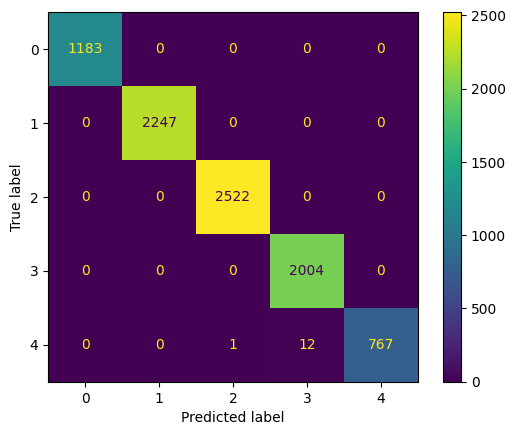

In [88]:
#Random Forest model

#creating the model max_depth=5, n_estimators=100
model = RandomForestClassifier(max_depth=5,n_estimators=100)

#fit the model with the training data
model.fit(X_train, y_train)

#predict the test data
y_pred = model.predict(X_test)

#confusion matrix comparing the predictions (y_pred) with the real values (y_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Iterate over the report dictionary and print only precision, recall, and f1-score
for class_name, metrics in report.items():
    if class_name != 'accuracy':
        print(f"Class: {class_name}")
        print(f"\tPrecision: {metrics['precision']}")
        print(f"\tRecall: {metrics['recall']}")
        print(f"\tF1-score: {metrics['f1-score']}")
        print()
    else:
        print(f"Accuracy: {metrics}")
        print()
        




5. The accuracy of our model is not the best. The reason could be having too many possible classes (grades). Let's transform the data again, but this time, instead of predicting grades, we want to predict whether the student will pass (grades 2, 3, 4 and 5) or fail (grade 1) math. After transforming the MathScore accordingly (0 - failed, 1 - passed), repeat task 4 and compare the results.

In [89]:
#transform grades into failed (0) or passed (1)

#same procedure as exercise 2
fail = df.loc[(df['MathScore'] == 1), 'MathScore']
df.loc[fail.index, 'MathScore'] = 0

passed = df.loc[(df['MathScore'] == 2) | (df['MathScore'] == 3) | (df['MathScore'] == 4) | (df['MathScore'] == 5), 'MathScore']
df.loc[passed.index, 'MathScore'] = 1

print('Different values in the Mathscore colum:',df['MathScore'].unique())

#the columns that we will use as features (x)
features = ['MathScore', 'ReadingScore', 'WritingScore']
X = df[features]

#the column that we will use as predictions (y)
y = df['MathScore']

#split the data into train and test 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Different values in the Mathscore colum: [1 0]


Class: 0
	Precision: 1.0
	Recall: 1.0
	F1-score: 1.0

Class: 1
	Precision: 1.0
	Recall: 1.0
	F1-score: 1.0

Accuracy: 1.0

Class: macro avg
	Precision: 1.0
	Recall: 1.0
	F1-score: 1.0

Class: weighted avg
	Precision: 1.0
	Recall: 1.0
	F1-score: 1.0



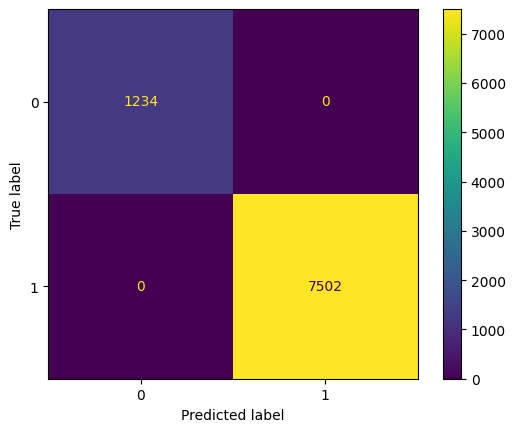

In [90]:
#Random Forest model

#creating the model max_depth=5, n_estimators=100
model = RandomForestClassifier(max_depth=5,n_estimators=100)

#fit the model with the training data
model.fit(X_train, y_train)

#predict the test data
y_pred = model.predict(X_test)

#confusion matrix comparing the predictions (y_pred) with the real values (y_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Iterate over the report dictionary and print only precision, recall, and f1-score
for class_name, metrics in report.items():
    if class_name != 'accuracy':
        print(f"Class: {class_name}")
        print(f"\tPrecision: {metrics['precision']}")
        print(f"\tRecall: {metrics['recall']}")
        print(f"\tF1-score: {metrics['f1-score']}")
        print()
    else:
        print(f"Accuracy: {metrics}")
        print()
        

6. Compare the results. Did our model work better in the first case or the second? Explain why and suggest a way to improve it.

The model that does a better job is the second one, because it has no failures (100% accuracy) and the first one has 99 percent. That is, the model gets a lot right, but misses more than the second one. This is due to in the first model we use more labels for the grades (1-5) and in the second model we use only two, so it is easier to classify.

The model can improve using another features that are more correlated with the dependent variable, instead of the ones that we use in the model or maybe we can include these new ones with the ones we use. Another way to improve the accuracy is to use another type of model that maybe has better performance in this situation or situations of this type (classification).

The point is to find the important features and create a good model with them, selecting the appropriate type of model.